# Preprocess

## 分句

In [8]:
doc = "这次必须给全五分！因为太完美了！整个就餐体验相当棒！\n口味：菜品做的都很干净！有图有真相，而且我都是随手拍的！鸡汁萝卜太鲜美了！就是份量有点少，下次我一个人吃一份哈哈哈！牛腱菜花很惊艳，已经吃腻了猪肉的，试试牛肉的非常好吃！带的有孩子还送了小米粥，这里的小米粥熬的很好很够火候！雪菜豆腐也很不错！豆豉蒸芥菜孩子喜欢吃！\n\n环境：西湖春天万象城店的环境我很喜欢！虽然开在商场里面，但是感觉很好，并不吵闹，而是很清净。\n服务：服务员都不错！这次是个男服务员，一直很耐心的推荐！\n人均：不点螃蟹的话50-80元\n这家店是每次带孩子来十有八九的选择！"

import re

sentences = re.split('(。|！|\!|\.|？|\?|\n|；)', doc)

seperate_set = set("。！.\n；")
seperate_set.add("")
print(seperate_set)

sentences = [s for s in sentences if s not in seperate_set]

print(sentences)


['这次必须给全五分！因为太完美了！整个就餐体验相当棒！', '口味：菜品做的都很干净！有图有真相，而且我都是随手拍的！鸡汁萝卜太鲜美了！就是份量有点少，下次我一个人吃一份哈哈哈！牛腱菜花很惊艳，已经吃腻了猪肉的，试试牛肉的非常好吃！带的有孩子还送了小米粥，这里的小米粥熬的很好很够火候！雪菜豆腐也很不错！豆豉蒸芥菜孩子喜欢吃！', '', '环境：西湖春天万象城店的环境我很喜欢！虽然开在商场里面，但是感觉很好，并不吵闹，而是很清净。', '服务：服务员都不错！这次是个男服务员，一直很耐心的推荐！', '人均：不点螃蟹的话50-80元', '这家店是每次带孩子来十有八九的选择！']


In [ ]:
from preprocess import read_from_csv_doc

docs, labels, word_counter = read_from_csv_doc("./data/restaurant/","train", 50, 100)


## word_freq

In [ ]:
sum = 0
word_more_than_10 = []

for word, freq in word_counter.items():
    if freq > 10:
        sum += 1
        word_more_than_10.append((word, freq))
print(sum)
print(word_more_than_10)

# set min_word_freq to 10 is reasonable

## sent_len and doc_len distribution

[(7, 8639), (8, 8563), (9, 8108), (6, 7911), (1, 7496), (10, 6976), (5, 6642), (11, 5804), (4, 5420), (12, 4899), (3, 4412), (2, 4330), (13, 3951), (14, 3148), (15, 2686), (16, 2155), (17, 1845), (18, 1569), (19, 1418), (20, 1173), (21, 958), (22, 815), (23, 686), (24, 585), (25, 513), (26, 420), (27, 401), (28, 347), (29, 336), (30, 277), (31, 258), (32, 205), (33, 176), (34, 175), (35, 170), (36, 135), (37, 118), (38, 113), (39, 110), (41, 83), (40, 72), (43, 72), (44, 64), (42, 60), (50, 58), (48, 57), (45, 55), (46, 55), (47, 44), (49, 36), (51, 35), (52, 29), (54, 28), (55, 25), (53, 21), (56, 19), (65, 16), (57, 16), (58, 15), (59, 14), (62, 14), (66, 13), (60, 12), (61, 10), (70, 8), (83, 8), (69, 8), (76, 7), (75, 6), (63, 6), (68, 6), (64, 6), (81, 5), (71, 5), (78, 5), (67, 4), (74, 4), (77, 4), (79, 4), (82, 4), (72, 4), (80, 3), (109, 3), (73, 3), (103, 2), (86, 2), (88, 2), (98, 2), (99, 2), (90, 2), (84, 2), (91, 1), (85, 1), (111, 1), (97, 1), (101, 1), (100, 1), (93, 1)

Text(0, 0.5, 'freq')

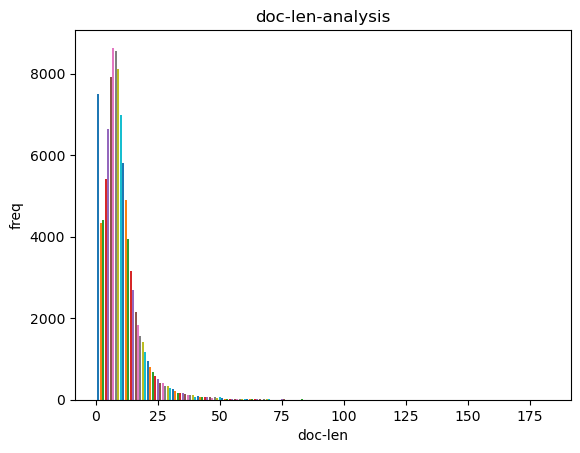

In [3]:
from collections import Counter
import matplotlib.pyplot as plt


doc_len = [len(doc) for doc in docs]

doc_len_counter = Counter(doc_len)
print(doc_len_counter.most_common())

doc_len_sorted = sorted(doc_len_counter.items(), key=lambda x:x[0])
x_data = [len for len, freq in doc_len_sorted]
y_data = [freq for len, freq in doc_len_sorted]

for i in range(len(x_data)):
    plt.bar(x_data[i], y_data[i])

plt.title("doc-len-analysis")
plt.xlabel("doc-len")
plt.ylabel("freq")

# set sentence_limit to 25 is reasonable

[(9, 39919), (8, 39626), (7, 39481), (10, 39417), (11, 39269), (12, 38234), (6, 38216), (5, 37753), (13, 36946), (4, 35360), (14, 35071), (15, 33692), (16, 32095), (17, 30419), (3, 30318), (18, 29157), (19, 27070), (20, 25678), (1, 24607), (21, 23957), (2, 23549), (22, 22126), (23, 21025), (24, 19560), (25, 17985), (100, 17456), (26, 16951), (27, 15444), (28, 14455), (29, 13385), (30, 12278), (31, 11188), (32, 10607), (33, 9589), (34, 8926), (35, 8225), (36, 7856), (37, 7298), (38, 6710), (39, 6456), (40, 5797), (41, 5505), (42, 5059), (43, 4610), (44, 4376), (45, 4033), (46, 3736), (47, 3656), (48, 3361), (49, 3164), (51, 2905), (50, 2816), (52, 2663), (53, 2368), (54, 2292), (55, 2150), (56, 2030), (57, 1957), (58, 1771), (59, 1755), (60, 1594), (61, 1526), (62, 1430), (63, 1375), (64, 1296), (65, 1199), (66, 1120), (67, 1045), (69, 1009), (68, 1007), (70, 964), (71, 889), (72, 809), (73, 801), (75, 780), (76, 752), (74, 724), (77, 701), (78, 614), (79, 601), (81, 569), (80, 560), (8

Text(0, 0.5, 'freq')

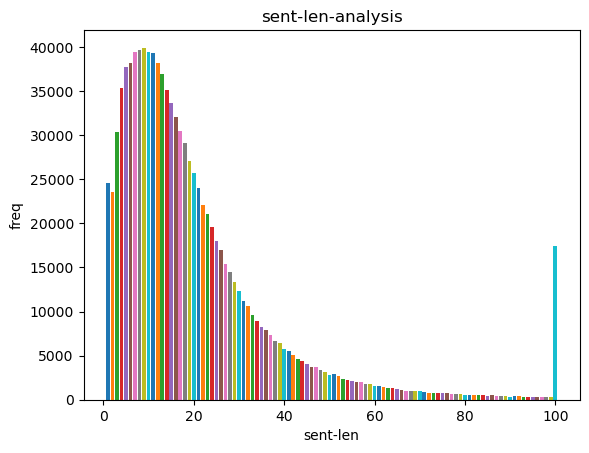

In [6]:
sent_len = [len(sent) for doc in docs for sent in doc]

sent_len_counter = Counter()
sent_len_counter.update(sent_len)

print(sent_len_counter.most_common())
sent_len_sorted = sorted(sent_len_counter.items(), key=lambda x:x[0])
x_data = [len for len, freq in sent_len_sorted]
y_data = [freq for len, freq in sent_len_sorted]

for i in range(len(x_data)):
    plt.bar(x_data[i], y_data[i])

plt.title("sent-len-analysis")
plt.xlabel("sent-len")
plt.ylabel("freq")

# set word limit to 40 is reasonable

In [1]:
from preprocess import run_prepro_doc

word_limit = 40
sent_limit = 25

train_docs, train_labels, valid_docs, valid_labels, test_docs, test_labels, word_map = \
    run_prepro_doc("./data/restaurant/", ".", word_limit=word_limit, sent_limit=sent_limit)


Training data: reading and preprocessing...



  0%|          | 0/105000 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/users12/yptong/hf/lib/python3.9/site-packages/jieba/__init__.py", line 154, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmp07mp8tlp' -> '/tmp/jieba.cache'
Loading model cost 0.713 seconds.
Prefix dict has been built successfully.
100%|██████████| 105000/105000 [03:07<00:00, 559.84it/s]



Training data: discarding words with counts less than 10, the size of the vocabulary is 37427.

Training data: word map saved to /users12/yptong/code/final-proj.

Valid data: reading and preprocessing...



100%|██████████| 15000/15000 [00:25<00:00, 591.84it/s]


Test data: reading and preprocessing...



100%|██████████| 15000/15000 [00:25<00:00, 590.28it/s]

All done!



In [2]:
docs_len = [len(doc) for doc in train_docs]
print(docs_len[:20])

[6, 6, 14, 10, 7, 6, 25, 14, 4, 9, 17, 7, 3, 9, 5, 10, 1, 7, 6, 8]


In [10]:
s = "看到朋友圈发出来的照片，觉得好美哦，就来尝试一下下，店家的位置在新天地旁，有点难找，不过交通还是很便利的。                                                                         【 甜心雨】美式咖啡+棉花糖，"
print(s.split())


['看到朋友圈发出来的照片，觉得好美哦，就来尝试一下下，店家的位置在新天地旁，有点难找，不过交通还是很便利的。', '【', '甜心雨】美式咖啡+棉花糖，']
['s', '', 's']


## load dataset

In [5]:
# from torch.utils.data import DataLoader
# import torch
# from datasets import DocDataset
#
# train_dataset = DocDataset(train_docs, train_labels, word_map, sent_limit, word_limit)
# print(train_dataset[1])
#
# train_dataloader = DataLoader()


(tensor([[ 79,  80,   9,  10,  81,  11,   5,  82,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 83,  84,  22,   4,  85,  86,  87,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 88,  89,  90,  91,  92,   3,  93,  11,  94,   5,  95,  96,  97,  98,
           3,  99, 100, 101, 102,  80,  11, 103,   5, 104,   3,  22, 105,  66,
          94,   8, 106, 107, 108,   3, 109, 110,  66,  94,   8, 111],
        [ 85, 112,  83, 113, 114, 115, 116, 117, 118,   5,   3, 119, 120,  95,
         121,  70, 122, 123,   5,   3, 124, 125, 126,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [127, 128,   3, 129, 114,  27, 130, 131, 132,   3, 119,  23,  27,   9,
        

In [28]:
import torch
def sequence_mask(X, valid_len, value=0):
    """在序列中屏蔽不相关的项"""
    maxlen = X.size(1)
    a = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :]
    b = valid_len[:, None]
    mask =  a < b
    X[~mask] = value
    return X
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
sequence_mask(X, torch.tensor([1, 2]))


KeyboardInterrupt



In [4]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch
a = [[1,2,2,4,0],[2,2,1,3,0],[1,6,5,0,0],[1,0,0,0,0]]
a = torch.tensor(a)
# 长度降序
lenths = [4,4,3,1]

packed = pack_padded_sequence(a,lenths,batch_first=True)

padded = pad_packed_sequence(packed, batch_first=True)
print(padded)

(tensor([[1, 2, 2, 4],
        [2, 2, 1, 3],
        [1, 6, 5, 0],
        [1, 0, 0, 0]]), tensor([4, 4, 3, 1]))


# Train

In [14]:
from argparse import Namespace

config = Namespace(
    lr = 0.0005,
    epoch = 10,
    batch_size = 128,
    word_emb_size = 300,
    word_rnn_size = 128,
    sent_rnn_size = 128,
    class_num = 4,
    word_att_size = 128,
    sent_att_size = 128,
)

from tqdm import tqdm
from torch.utils.data import DataLoader
from models import LSTM, TextCNN, HAN
import torch.nn as nn
from torch import optim
import torch
import torch.backends.cudnn as cudnn
from tutils import valid_and_save_doc, train_one_epoch_doc
from datasets import DocDataset

# cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
print("current device on :")
print(device)

current device on :
cuda


## main

In [16]:
bsz = 128

train_set = DocDataset(train_docs,train_labels, word_map, sent_limit, word_limit)
train_loader = DataLoader(train_set, batch_size=bsz, shuffle=True, pin_memory=True, num_workers=4)
valid_dataloader = DataLoader(DocDataset(valid_docs,valid_labels, word_map, sent_limit, word_limit),
                              batch_size=bsz, shuffle=False, pin_memory=True, num_workers=4)

# model = LSTM(300, 4, len(word_map), 256)
# switch to TextCNN
# model = TextCNN(100, 300, 0.5, 4, len(word_map), 0)
# model.train()

# switch to HAN

word_emb_size = 300
word_rnn_size = 128
sent_rnn_size = 128
class_num = 4
word_att_size = 128
sent_att_size = 128

model = HAN(len(word_map), word_emb_size, word_rnn_size, sent_rnn_size, class_num,
            word_att_size,sent_att_size )

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    params=filter(lambda p: p.requires_grad, model.parameters()),
    lr=0.0005
)
epoch_num = 10
ckpt_path = "./ckpt"


model = model.to(device)
loss_fn = loss_fn.to(device)

use_wandb = True
# log setting
if use_wandb:
    import wandb
    proj = "fine-grained-SA"
    wandb.init(project=proj, config=config, name="HAN-fifth-run")


In [17]:
for epoch in range(epoch_num):
    train_one_epoch_doc(train_loader, device, model, loss_fn, optimizer, epoch, use_wandb)
    # 一个epoch，在valid上做验证
    total_avg_loss, total_correct = valid_and_save_doc(valid_dataloader, device, model, loss_fn, epoch, ckpt_path)
    print("Loaded one epoch. Validate finished.")
    print(f"Avg_loss on valid_set:{total_avg_loss / len(valid_dataloader): .4f}\n"
          f"Avg_acc on valid_set:{total_correct / len(valid_labels): .4f}")

    if use_wandb:
        wandb.log({
            "valid/loss": total_avg_loss / len(valid_dataloader),
            "valid/acc": total_correct / len(valid_labels)
        }, commit=False)    
    

4it [00:00, 16.19it/s]

Epoch: [0][0/821]	Loss_avg: 1.3935	Accuracy 0.203 


821it [00:40, 20.13it/s]
118it [00:01, 66.61it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.6919
Avg_acc on valid_set: 0.7407


3it [00:00, 12.28it/s]

Epoch: [1][0/821]	Loss_avg: 0.7160	Accuracy 0.703 


821it [00:41, 19.97it/s]
118it [00:01, 80.66it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.6389
Avg_acc on valid_set: 0.7607


3it [00:00, 13.53it/s]

Epoch: [2][0/821]	Loss_avg: 0.6703	Accuracy 0.750 


821it [00:40, 20.37it/s]
118it [00:01, 68.79it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.6226
Avg_acc on valid_set: 0.7658


4it [00:00, 16.29it/s]

Epoch: [3][0/821]	Loss_avg: 0.6019	Accuracy 0.773 


821it [00:39, 20.72it/s]
118it [00:01, 73.29it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.6124
Avg_acc on valid_set: 0.7713


4it [00:00, 15.63it/s]

Epoch: [4][0/821]	Loss_avg: 0.4696	Accuracy 0.852 


821it [00:40, 20.44it/s]
118it [00:01, 82.31it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.6004
Avg_acc on valid_set: 0.7742


4it [00:00, 13.04it/s]

Epoch: [5][0/821]	Loss_avg: 0.5529	Accuracy 0.773 


821it [00:42, 19.21it/s]
118it [00:01, 81.94it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.5969
Avg_acc on valid_set: 0.7713


4it [00:00, 13.05it/s]

Epoch: [6][0/821]	Loss_avg: 0.5110	Accuracy 0.836 


821it [00:41, 20.01it/s]
118it [00:01, 74.96it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.5886
Avg_acc on valid_set: 0.7781


3it [00:00, 11.50it/s]

Epoch: [7][0/821]	Loss_avg: 0.5944	Accuracy 0.805 


821it [00:42, 19.38it/s]
118it [00:01, 73.32it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.6033
Avg_acc on valid_set: 0.7698


4it [00:00, 16.70it/s]

Epoch: [8][0/821]	Loss_avg: 0.5979	Accuracy 0.773 


821it [00:40, 20.36it/s]
118it [00:01, 82.68it/s] 


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.5867
Avg_acc on valid_set: 0.7788


4it [00:00, 15.31it/s]

Epoch: [9][0/821]	Loss_avg: 0.5559	Accuracy 0.812 


821it [00:40, 20.35it/s]
118it [00:01, 85.26it/s]


Loaded one epoch. Validate finished.
Avg_loss on valid_set: 0.5843
Avg_acc on valid_set: 0.7818
